# Exploratory Data Analysis

The exploratory data analysis (EDA) stage is crucial for understanding the details of time series in trading, especially in the context of forex. In this study, we focus on the EUR/USD currency pair, which represents the value of the euro in terms of US dollars. This currency pair is highly relevant in international markets due to its high liquidity and the economic stability of the economies involved.

## Objective of the EDA

The main objective of this EDA is to thoroughly analyze how the EUR/USD bid price fluctuates on a specific date: September 26, 2022. We aim to understand price movements during that day to gain valuable insights into the behavior on this particular date. Key aspects we will address include:

1. **Price Variations Throughout the Day**: Examine the fluctuations in the EUR/USD price during the selected day to identify intraday behavior patterns and significant price changes.

2. **Trend and Volatility Analysis**: Assess the price volatility and trends throughout the day to better understand how the price changes at different times.

3. **Data Visualization**: Use graphical tools to represent price variations and other relevant indicators, making data interpretation and analysis easier.

4. **Anomaly Detection**: Identify any anomalies or unusual events in the price behavior that may have occurred during the day.

In the following analysis, we will explore the EUR/USD dataset for September 26, 2022, aiming to get a clear view of the price movements on that day.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot

In [ ]:
dftra = pd.read_csv("/content/26-09-2022.txt", sep=",", header=0)
print(dftra.head())

                         fecha   hora_exacta  precio_bid   volumen_bid  \
26/09/2022  00:00:00.033000000        0.9687          14        0.9688   
26/09/2022  00:00:00.045000000        0.9687           4        0.9688   
26/09/2022  00:00:00.045000000        0.9687           3        0.9688   
26/09/2022  00:00:00.045000000        0.9687           3        0.9688   
26/09/2022  00:00:00.045000000        0.9687           1        0.9688   

             precio_ask  volumen_ask   instrumento_EUR/USD  
26/09/2022            8            E                   NaN  
26/09/2022            8            E                   NaN  
26/09/2022            8            E                   NaN  
26/09/2022           18            E                   NaN  
26/09/2022           18            E                   NaN  


## Description of the Trading DataFrame

This DataFrame contains transaction records for the EUR/USD currency trading on September 26, 2022, with the following columns:

- **fecha**: Transaction date. All records correspond to September 26, 2022, including hour, minutes, and seconds.

- **hora_exacta**: Exact transaction time with nanosecond precision. The records have timestamps in the same fraction of a second (e.g., 00:00:00.033 and 00:00:00.045).

- **precio_bid**: Bid price for each transaction.

- **volumen_bid**: Volume associated with the bid price. It varies between transactions.

- **precio_ask**: Ask price.

- **volumen_ask**: Volume associated with the ask price.

- **instrumento_EUR/USD**: Related to the EUR/USD instrument.



In [ ]:
num_filas = dftra.shape[0]
print("Número de filas:", num_filas)

nombres_columnas = dftra.columns
print("Nombres de las columnas:", nombres_columnas)

resumen_dftra = dftra.describe(include='all')
print("Resumen del DataFrame:")
print(resumen_dftra)

Número de filas: 1223313
Nombres de las columnas: Index(['fecha', ' hora_exacta', 'precio_bid', ' volumen_bid', ' precio_ask',
       ' volumen_ask', ' instrumento_EUR/USD'],
      dtype='object')
Resumen del DataFrame:
                     fecha   hora_exacta    precio_bid   volumen_bid  \
count              1223313  1.223313e+06  1.223313e+06  1.223313e+06   
unique              500630           NaN           NaN           NaN   
top     05:14:18.132000000           NaN           NaN           NaN   
freq                    45           NaN           NaN           NaN   
mean                   NaN  9.704096e-01  1.862888e+01  9.705178e-01   
std                    NaN  2.460179e-03  1.206868e+01  2.460008e-03   
min                    NaN  9.642000e-01  1.000000e+00  9.643000e-01   
25%                    NaN  9.684000e-01  7.000000e+00  9.685000e-01   
50%                    NaN  9.703000e-01  1.800000e+01  9.704000e-01   
75%                    NaN  9.723000e-01  2.900000e+01  9.72

In [ ]:
print(dftra[' volumen_ask'])

26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
             ..
26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
26/09/2022    E
Name:  volumen_ask, Length: 1223313, dtype: object


## DataFrame Analysis

### **Number of Rows:** 1,223,313

### **Columns:**
- **'fecha'**: Column corresponding to specific timestamps (e.g., 05:14:18.132000000).
- **hora_exacta**: Exact time with nanosecond precision for the EUR/USD currency.
- **precio_bid**: Bid price with an average of 0.9687 and a low standard deviation, indicating a concentration of prices.
- **volumen_bid**: Volume associated with the bid price (minimum 1, maximum 489).
- **precio_ask**: Ask price with an average of 18.39 (minimum 1, maximum 252).
- **volumen_ask**: Column with a single value ('E'), likely indicating an error or missing data.
- **instrumento_EUR/USD**: Empty column.




## Date Conversion

To create frequency plots using the dates in the EUR/USD dataset.

In [ ]:
dftra['fechac'] = dftra['fecha']
dftra['hora'] = pd.to_datetime(dftra['fecha']).dt.hour
dftra['INTERVALO_HORAS'] = (dftra['hora'] // 2) * 2
dftra['INTERVALO_HORAS'] = dftra['INTERVALO_HORAS'].apply(lambda x: f"{x:02d}:00 - {x+2:02d}:00")

dftra['fecha'] = dftra['fechac']

<ipython-input-50-51b35664edf7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftra['hora'] = pd.to_datetime(dftra['fecha']).dt.hour


### Hourly Interval Analysis

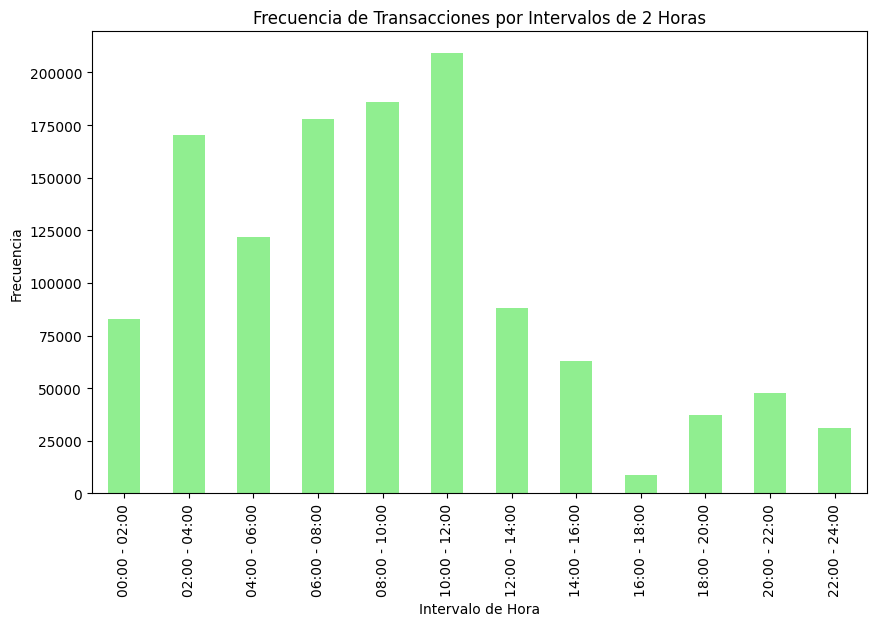

In [ ]:
frecuencia_transacciones_intervalos = dftra.groupby('INTERVALO_HORAS').size()

#Graficar la frecuencia de transacciones por intervalos de 2 horas
plt.figure(figsize=(10, 6))
frecuencia_transacciones_intervalos.plot(kind='bar', color='lightgreen')
plt.title('Frecuencia de Transacciones por Intervalos de 2 Horas')
plt.xlabel('Intervalo de Hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

We observe that the frequency of data in the DataFrame is distributed as shown in the graph. It can be seen that the highest number of records were taken between 06:00 and 12:00 hours, while the period with the fewest records was between 16:00 and 24:00 hours.

### Exact Time Analysis


<Figure size 1000x600 with 0 Axes>

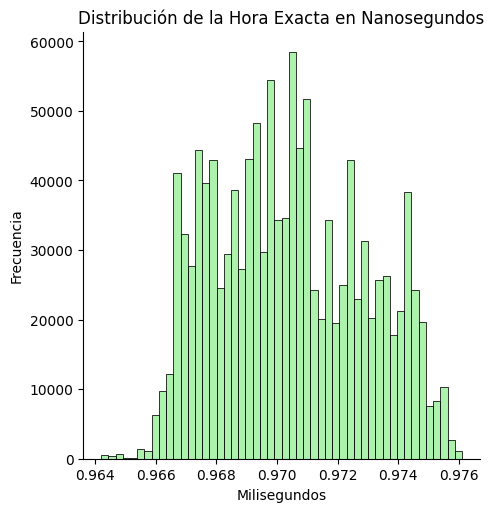

In [ ]:
# Graficar la distribución de los milisegundos
plt.figure(figsize=(10, 6))
sns.displot(dftra[' hora_exacta'], bins=50, color='lightgreen', edgecolor='black') # Use line_kws to change the color of the KDE line
plt.title('Distribución de la Hora Exacta en Nanosegundos')
plt.xlabel('Milisegundos')
plt.ylabel('Frecuencia')
plt.show()



This graph presents the frequency distribution with respect to the exact time given in nanoseconds. A peak can be observed between 0.970 and 0.972, where the highest concentration of data occurs. Additionally, the distribution appears to be almost normal.

### Bid Price Analysis

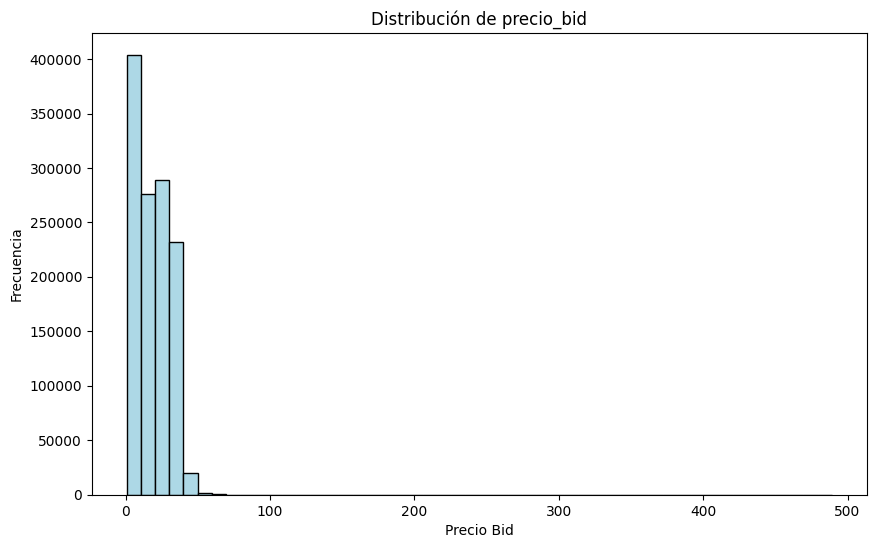

In [ ]:
# Histograma para precio_bid
plt.figure(figsize=(10, 6))
plt.hist(dftra['precio_bid'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución de precio_bid')
plt.xlabel('Precio Bid')
plt.ylabel('Frecuencia')
plt.show()



Here, we can observe the distribution of the bid price and the concentration of data with respect to the price. A higher concentration is seen at lower prices, followed by another, less pronounced, concentration around the 36-40 range. As the price increases, the frequency decreases significantly.



### Ask Price Analysis


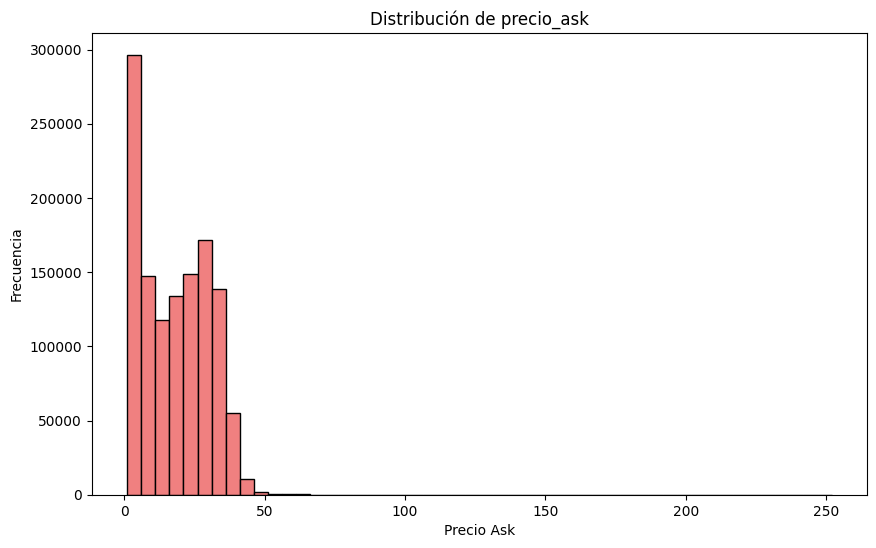

In [ ]:
# Histograma para precio_ask
plt.figure(figsize=(10, 6))
plt.hist(dftra[' precio_ask'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribución de precio_ask')
plt.xlabel('Precio Ask')
plt.ylabel('Frecuencia')
plt.show()


We observe a behavior almost identical to that of the bid price. Initially, there is the highest frequency, followed by a second significant peak between 34 and 38.



### Bid Volume Analysis

<Figure size 1000x600 with 0 Axes>

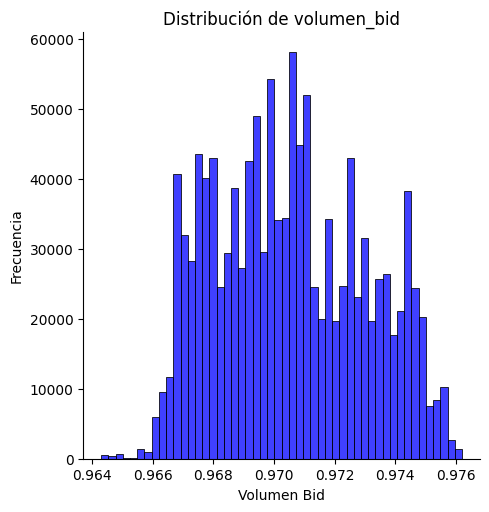

In [ ]:
# Histograma para volumen_bid
plt.figure(figsize=(10, 6))
sns.displot(dftra[' volumen_bid'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de volumen_bid')
plt.xlabel('Volumen Bid')
plt.ylabel('Frecuencia')
plt.show()



In this graph, we observe a distribution that appears almost normal, with a peak between 0.970 and 0.972. On both sides of the peak, there is a progressive decrease.



## NA'S

In [ ]:
total_na = dftra.isna().sum().sum()
print(f"Total NA : {total_na}")

Total NA en el DataFrame: 1223313


In [ ]:
dftra.isnull().sum()

,0
fecha,0
hora_exacta,0
precio_bid,0
volumen_bid,0
precio_ask,0
volumen_ask,0
instrumento_EUR/USD,1223313
fechac,0
hora,0
INTERVALO_HORAS,0


## Correlation 






In [ ]:
dftra[' volumen_ask'] = pd.to_numeric(dftra[' volumen_ask'], errors='coerce')

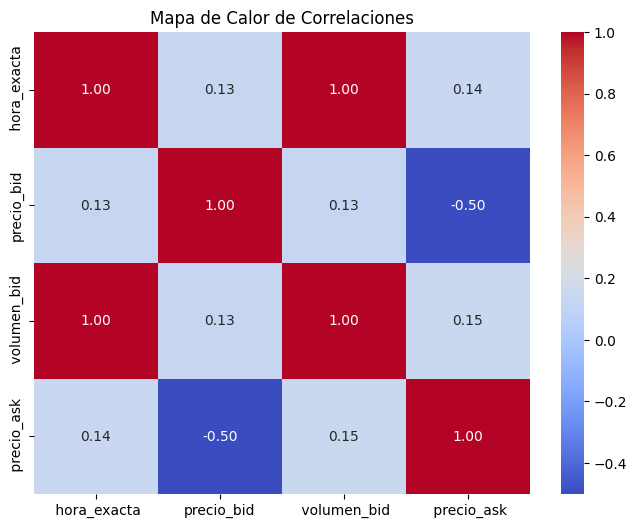

In [ ]:
df_numeric = dftra[[' hora_exacta', 'precio_bid', ' volumen_bid', ' precio_ask']]

correlation_matrix = df_numeric.corr()
# Graficar el mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()



We observe a high correlation between `volumen_bid` and `hora_exacta`, as well as a strong correlation among other variables in the DataFrame. Additionally, a negative correlation of -0.50 is highlighted between `precio_bid` and `precio_ask`.


In [ ]:
dftra.set_index('fechac', inplace=True)

In [ ]:
# Convertir columnas a numéricas
dftra['precio_bid'] = pd.to_numeric(dftra['precio_bid'], errors='coerce')

### Time Series Analysis of "precio_bid"


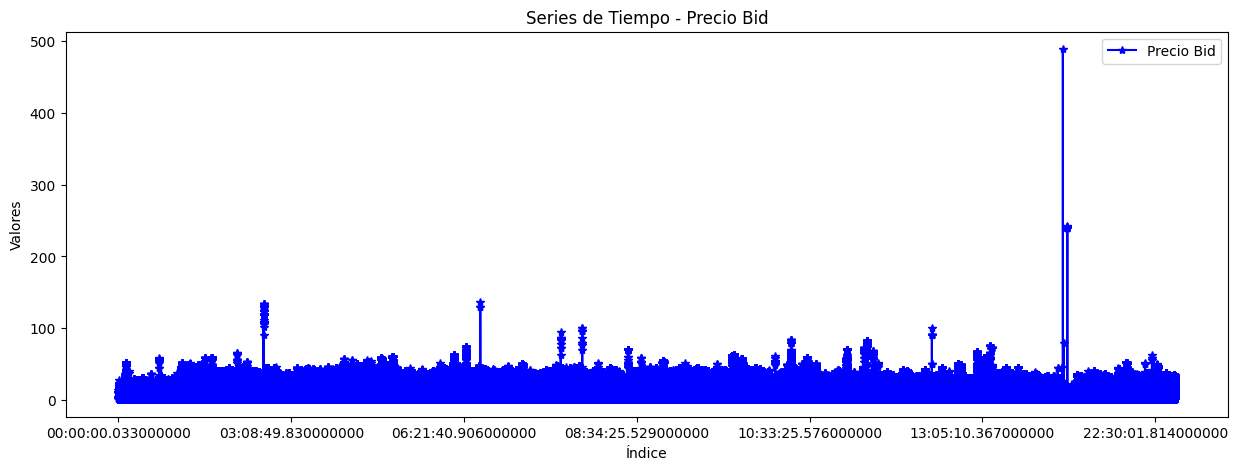

In [ ]:
plt.rcParams.update({'figure.figsize': (7, 4)})

# Graficar la serie precio_bid
plt.figure(figsize=(15, 5))
dftra['precio_bid'].plot(linestyle='-', marker='*', color='b')


plt.legend(['Precio Bid'], loc='best')
plt.title('Series de Tiempo - Precio Bid')
plt.ylabel('Valores')
plt.xlabel('Índice')
plt.show()



Precio Bid - Mean1 = 8.68, Mean2 = 18.63
Precio Bid - Variance1 = 36.87, Variance2 = 145.65


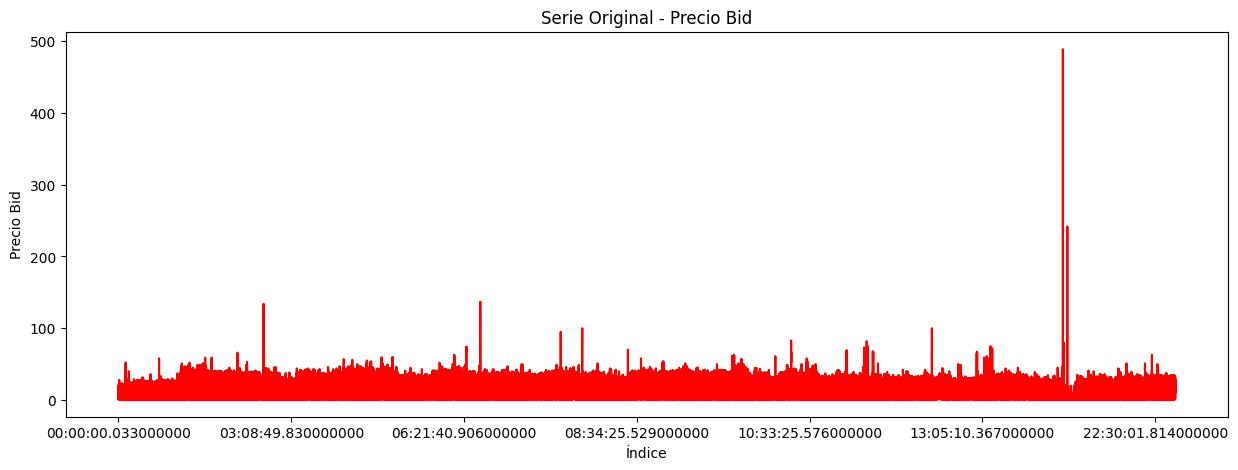

In [ ]:
plt.rcParams.update({'figure.figsize': (15, 5)})

# Cálculo de medias y varianzas para las primeras y las siguientes 100 observaciones
Mean1, Mean2 = dftra['precio_bid'].iloc[:100].mean(), dftra['precio_bid'].iloc[100:].mean()
Var1, Var2 = dftra['precio_bid'].iloc[:100].var(), dftra['precio_bid'].iloc[100:].var()

print(f'Precio Bid - Mean1 = {Mean1:.2f}, Mean2 = {Mean2:.2f}')
print(f'Precio Bid - Variance1 = {Var1:.2f}, Variance2 = {Var2:.2f}')
dftra['precio_bid'].plot(color='r')
plt.title(f'Serie Original - Precio Bid')
plt.xlabel('Índice')
plt.ylabel('Precio Bid')
plt.show()



The time series shows a behavior with some minor peaks throughout the day. However, a noticeable peak can be seen in the time interval between 13:05:10 and 22:30:01. This pattern can be observed in both the previous and current graphs.

Additionally, an analysis comparing the mean of the first 100 observations to the next 100 was conducted to evaluate whether the time series is stationary. Based on the results, it appears that the series does not exhibit clear seasonality.


# Q-Q plot



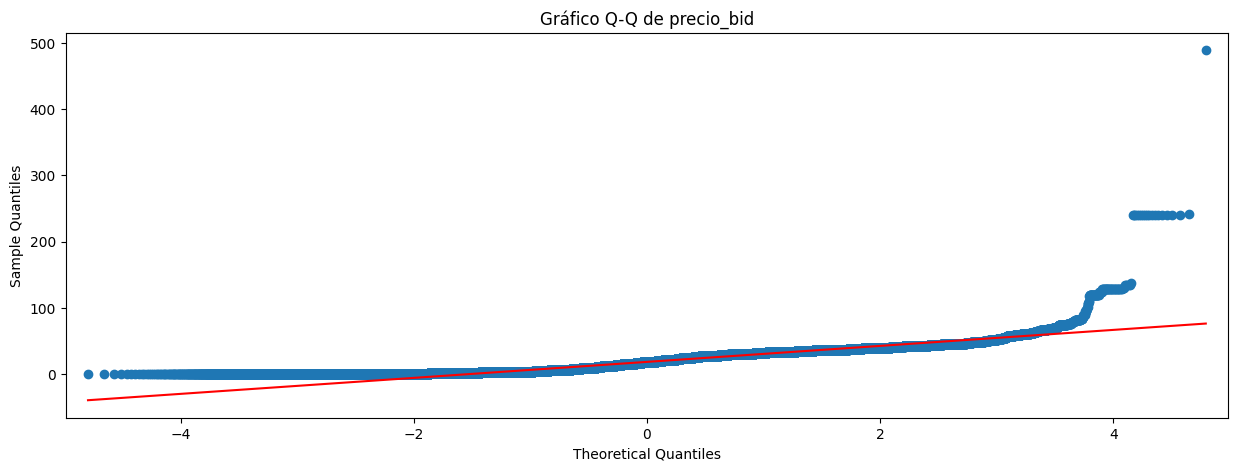

In [ ]:
# Crear el gráfico Q-Q para la serie 'precio_bid'
qqplot(dftra["precio_bid"], line='s')
plt.title('Gráfico Q-Q de precio_bid')
plt.show()

The graph shows an almost normal distribution. However, at the beginning, there is a slight deviation from the normal line. Significant deviations are present at the end, which coincides with the peaks observed in the time series. This suggests that the distribution is likely not completely normal.


# Kolmogorov-Smirnov (KS) Test

**Hypothesis Statement:**
- **Null Hypothesis (H0)**: The data series follows a normal distribution.
- **Alternative Hypothesis (H1)**: The data series does not follow a normal distribution.




In [ ]:
from scipy.stats import kstest

# Kolmogorov-Smirnov
ks_stat, ks_p_value = kstest(dftra["precio_bid"], 'norm')

# Imprimir los resultados
print(f'Estadístico de KS: {ks_stat}')
print(f'Valor p: {ks_p_value}')

# Interpretación
if ks_p_value < 0.05:
    print("La serie no sigue una distribución normal (rechazamos la hipótesis nula)")
else:
    print("La serie sigue una distribución normal (no rechazamos la hipótesis nula)")


Estadístico de KS: 0.9462561648867273
Valor p: 0.0
La serie no sigue una distribución normal (rechazamos la hipótesis nula)


Given that the p-value is 0.0, we reject the null hypothesis, concluding that the **precio_bid** time series does not follow a normal distribution. This is consistent with the observations made in the Q-Q plot, where significant deviations from normality are noticeable, particularly in the extreme values.


## Reference to the Case Study

In Professor **Lihki Rubio's** paper, a case is presented using the technique of **Time Series Data Resampling**. This technique is demonstrated with a time series of chemical concentrations taken every two hours between January 1, 1975, and January 17, 1975.

This case will serve as a guide for developing the analysis of our own time series, which contains a very large amount of data. Resampling will allow us to simplify the dataset while preserving the characteristics of the series.

**Credits to the paper**: *Introduction to Time Series — Time Series Analysis and Prediction*.



## Resampling

<ipython-input-66-b83bb35189f9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dftra['fecha'] = pd.to_datetime(dftra['fecha'])


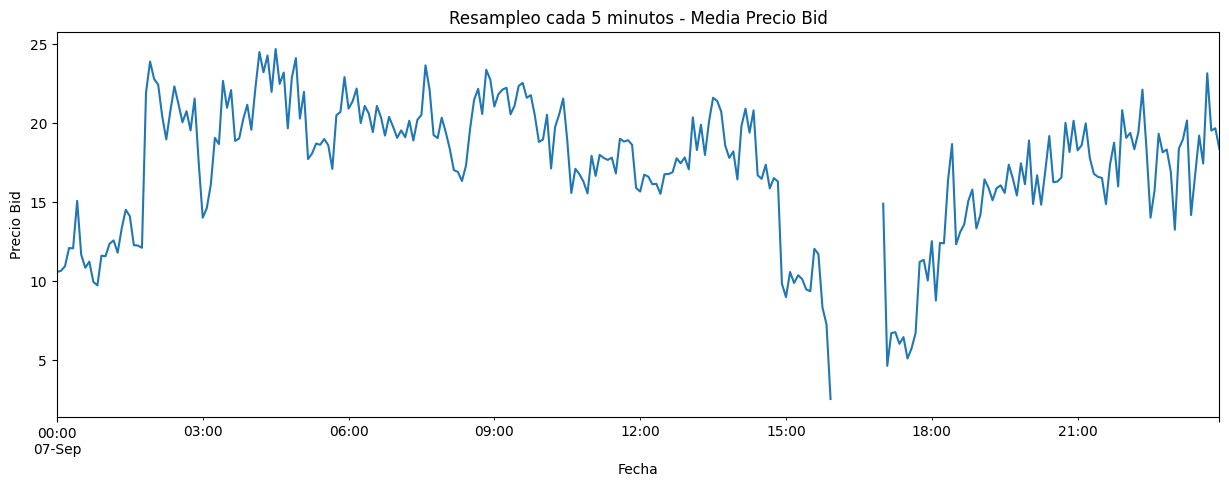

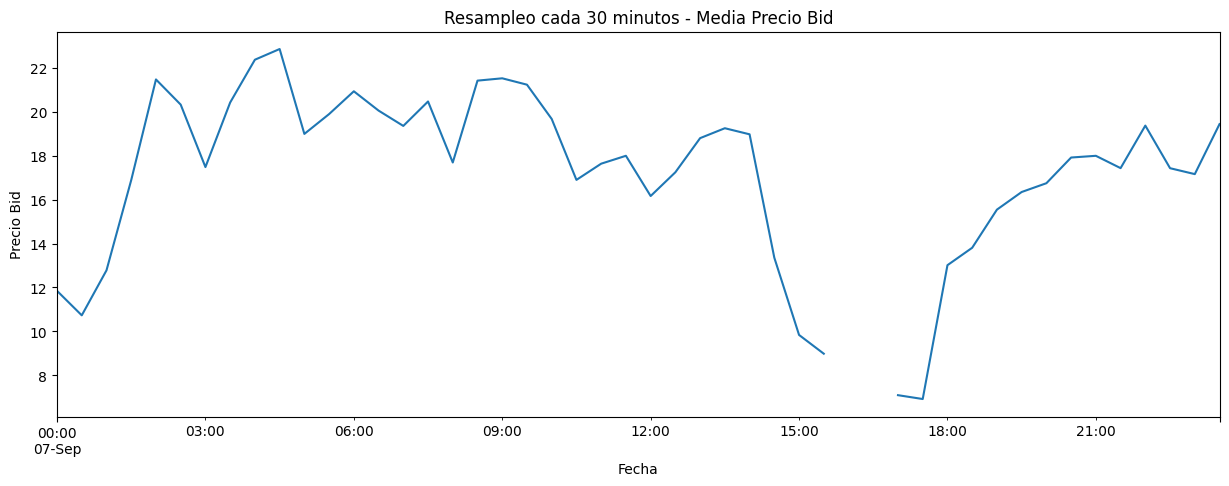

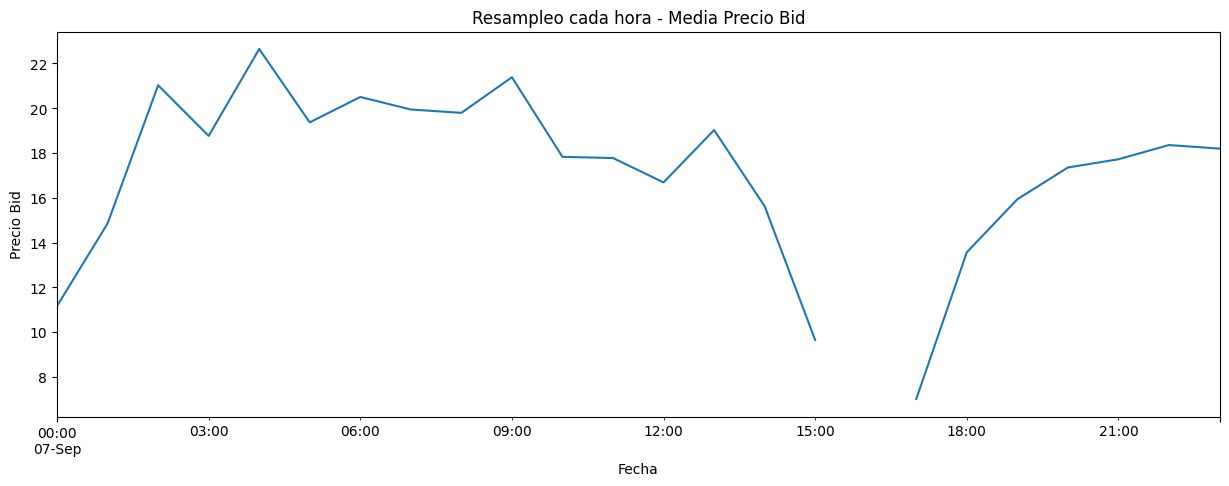

In [ ]:
dftra['fecha'] = pd.to_datetime(dftra['fecha'])
dftra = dftra.set_index('fecha')
non_numeric_cols = dftra.select_dtypes(exclude=['number', 'datetime']).columns
for col in non_numeric_cols:
    dftra[col] = pd.to_numeric(dftra[col], errors='coerce')
df5min = dftra.resample('5T').mean()
df30min = dftra.resample('30T').mean()
dfhora = dftra.resample('H').mean()
def plot_resampled_data(df_resampled, title):
    df_resampled['precio_bid'].plot(color='tab:blue')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio Bid')
    plt.show()

plot_resampled_data(df5min, 'Resampleo cada 5 minutos - Media Precio Bid')
plot_resampled_data(df30min, 'Resampleo cada 30 minutos - Media Precio Bid')
plot_resampled_data(dfhora, 'Resampleo cada hora - Media Precio Bid')



After resampling, we observe the following time series plots at intervals of "5 minutes," "30 minutes," and "1 hour." The first noticeable aspect is that as the interval increases, the series becomes smoother. Initially, the series seems to show a general trend, but over time, subtle cyclical changes begin to appear. Additionally, an interruption in the series is observed between 15:00 and 17:00, which is also reflected in the transaction frequency graph for 2-hour intervals.



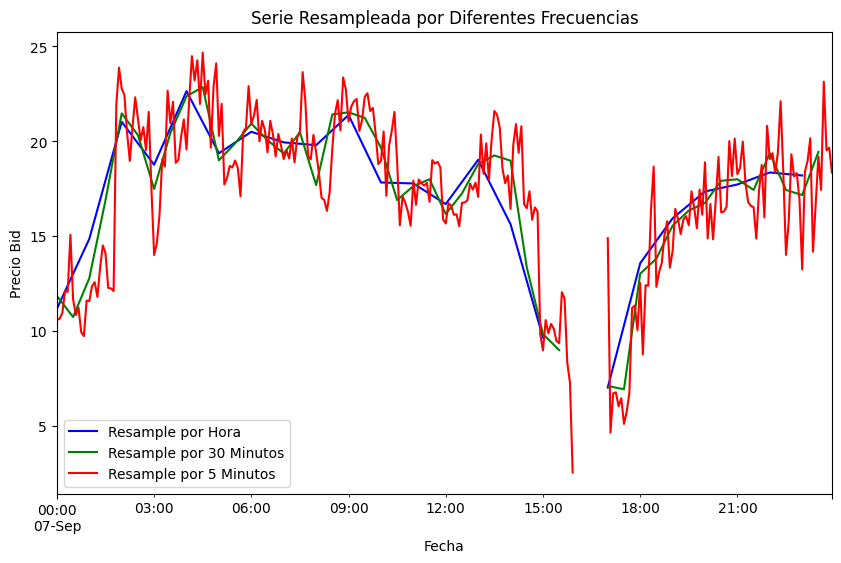

In [ ]:
df_hora = dftra['precio_bid'].resample('H').mean()
df_30min = dftra['precio_bid'].resample('30T').mean()
df_5min = dftra['precio_bid'].resample('5T').mean()

fig, ax = plt.subplots(figsize=(10, 6))

# Serie resampleada por hora en azul
df_hora.plot(ax=ax, color='b', label='Resample por Hora')

# Serie resampleada por 30 minutos en verde
df_30min.plot(ax=ax, color='g', label='Resample por 30 Minutos')

# Serie resampleada por 5 minutos en rojo
df_5min.plot(ax=ax, color='r', label='Resample por 5 Minutos')

ax.set_title('Serie Resampleada por Diferentes Frecuencias')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Bid')
plt.legend()
plt.show()


In this graph, the resampling by hour, 30 minutes, and 5 minutes of the "precio_bid" time series are overlaid. Aspects previously mentioned can be observed, such as the smoothness of the series as the time interval increases, as well as the interruption in the interval between 15:00 and 17:00.



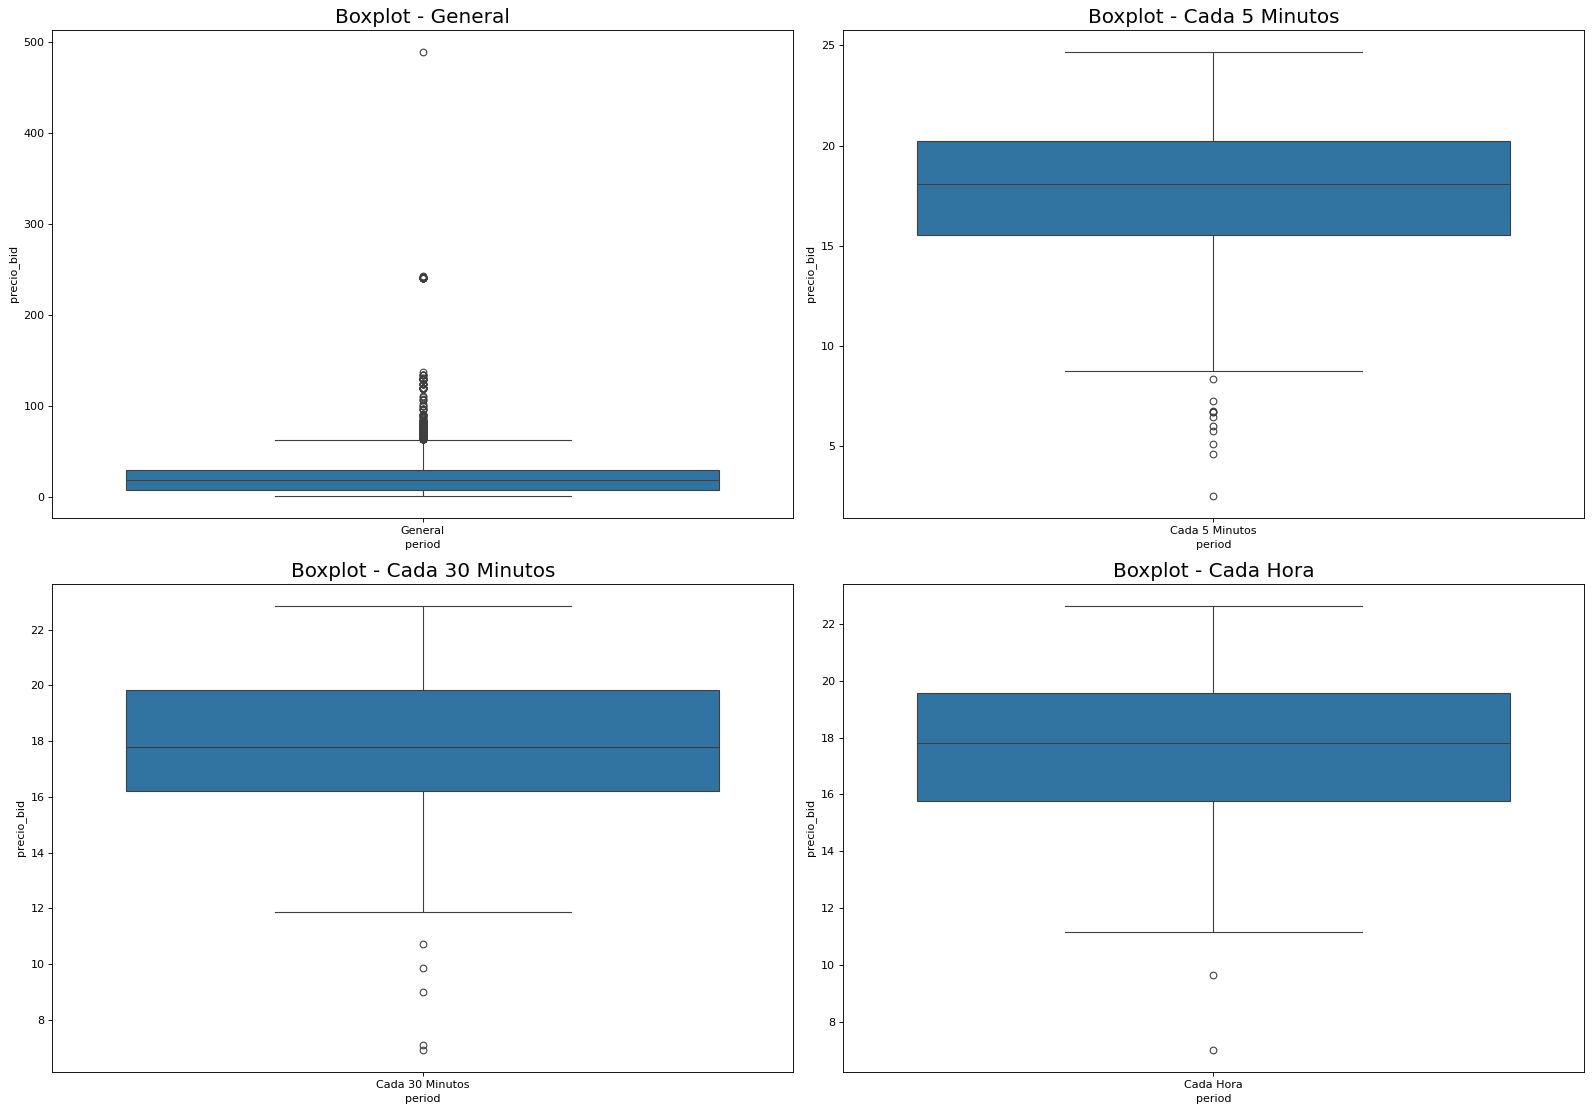

In [ ]:
non_numeric_cols = dftra.select_dtypes(exclude=['number', 'datetime']).columns
for col in non_numeric_cols:
    dftra[col] = pd.to_numeric(dftra[col], errors='coerce')
df5min = dftra.resample('5T').mean()
df30min = dftra.resample('30T').mean()
dfhora = dftra.resample('H').mean()
def prepare_boxplot_data(df, period):
    df = df.reset_index()
    df['period'] = period
    return df
dftra_boxplot = prepare_boxplot_data(dftra, 'General')
df5min_boxplot = prepare_boxplot_data(df5min, 'Cada 5 Minutos')
df30min_boxplot = prepare_boxplot_data(df30min, 'Cada 30 Minutos')
dfhora_boxplot = prepare_boxplot_data(dfhora, 'Cada Hora')
combined_df = pd.concat([dftra_boxplot, df5min_boxplot, df30min_boxplot, dfhora_boxplot])
fig, axes = plt.subplots(2, 2, figsize=(20, 14), dpi=80)
sns.boxplot(x='period', y='precio_bid', data=dftra_boxplot, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - General', fontsize=18)
sns.boxplot(x='period', y='precio_bid', data=df5min_boxplot, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Cada 5 Minutos', fontsize=18)
sns.boxplot(x='period', y='precio_bid', data=df30min_boxplot, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - Cada 30 Minutos', fontsize=18)
sns.boxplot(x='period', y='precio_bid', data=dfhora_boxplot, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot - Cada Hora', fontsize=18)
plt.tight_layout()
plt.show()



In the graphs, the distribution of **precio_bid** is shown across different time intervals: without resampling (general), every 5 minutes, every 30 minutes, and every 1 hour.

* **General**: There are many high outliers, indicating transactions with very elevated bid prices. Most of the data is concentrated in lower prices, with a highly skewed distribution.
* **Every 5 Minutes**: The distribution is more detailed, with less dispersion and some lower outliers. The main concentration is between 15 and 20 units.
* **Every 30 Minutes**: The distribution is similar to that of 5 minutes, but smoother with fewer outliers. This shows that as the resampling interval increases, outliers have less impact on the distribution.
* **Every 1 Hour**: The bid price distribution is even smoother, with fewer visible outliers. The interquartile range is similar to the 30-minute boxplot, suggesting stability in the median as the interval increases.


## Analysis of Autocorrelation and Partial Autocorrelation Graphs


Autocorrelación para datos resampleados cada 5 minutos:


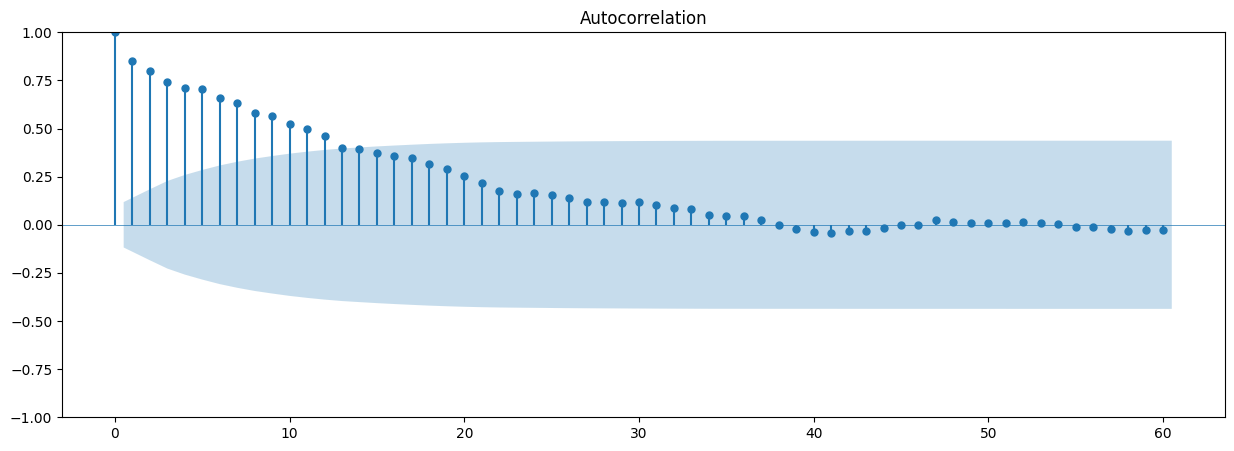

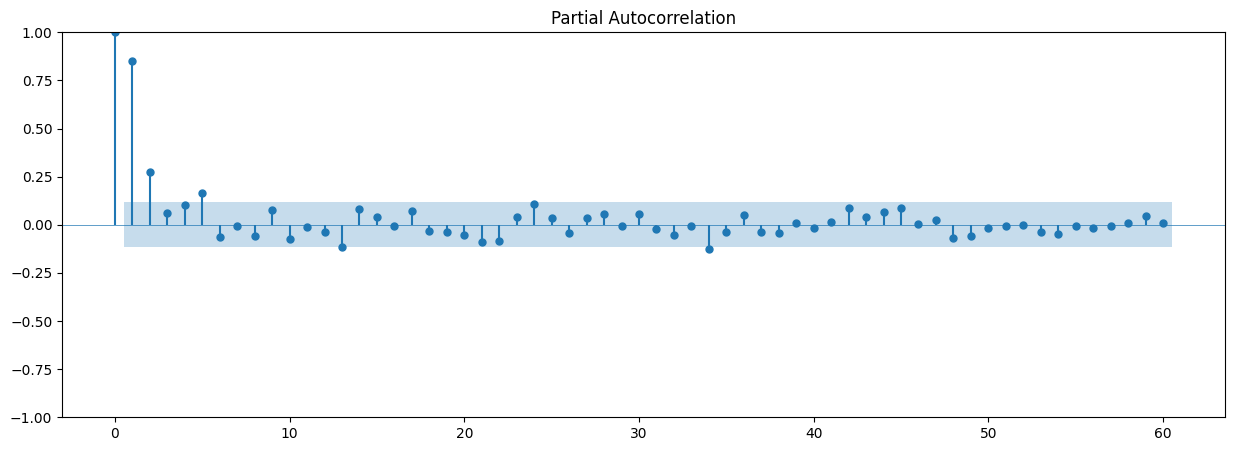

In [ ]:
df5min = dftra.resample('5T').mean()
# Número de lags
nlag = 60

# Autocorrelación y autocorrelación parcial para datos resampleados cada 5 minutos
print("Autocorrelación para datos resampleados cada 5 minutos:")
plot_acf(df5min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación
plt.show()

plot_pacf(df5min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación parcial
plt.show()

Autocorrelación para datos resampleados cada 30 minutos:


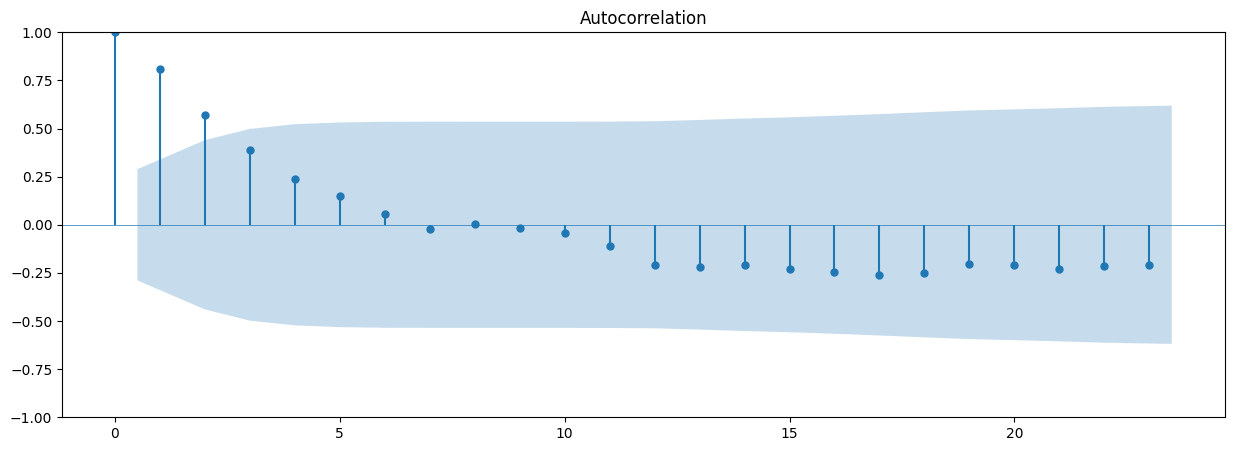

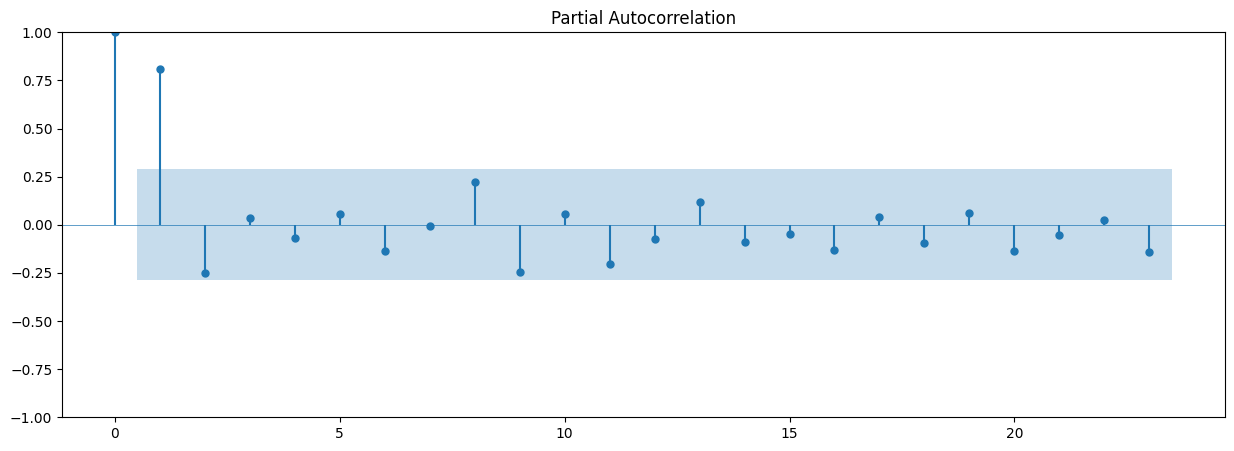

In [ ]:
# Resamplear los datos
df30min = dftra.resample('30T').mean()
# Número de lags
nlag = 23

# Autocorrelación y autocorrelación parcial para datos resampleados cada 30 minutos
print("Autocorrelación para datos resampleados cada 30 minutos:")
plot_acf(df30min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación
plt.show()

plot_pacf(df30min['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación parcial
plt.show()

Autocorrelación para datos resampleados cada 1 hora:


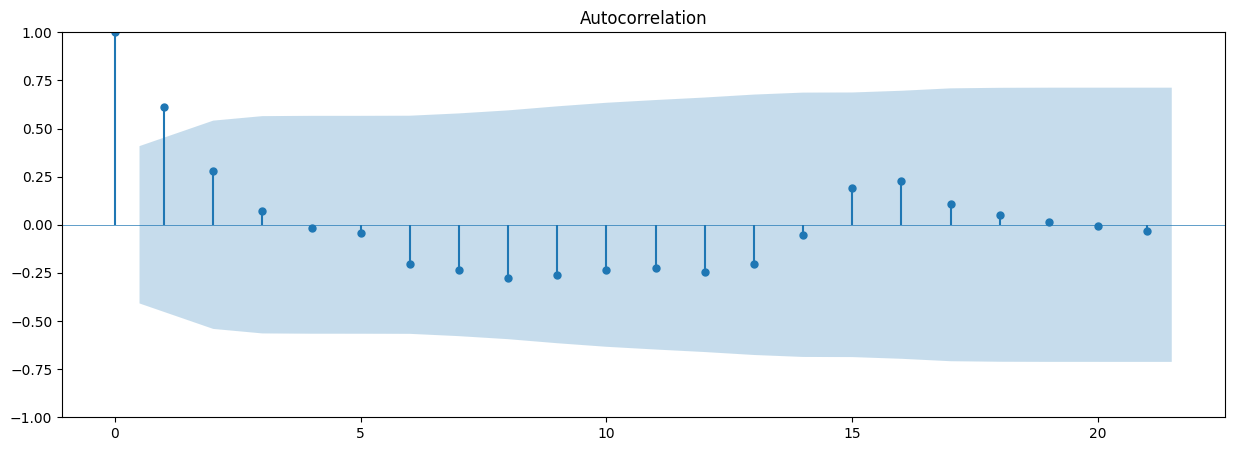

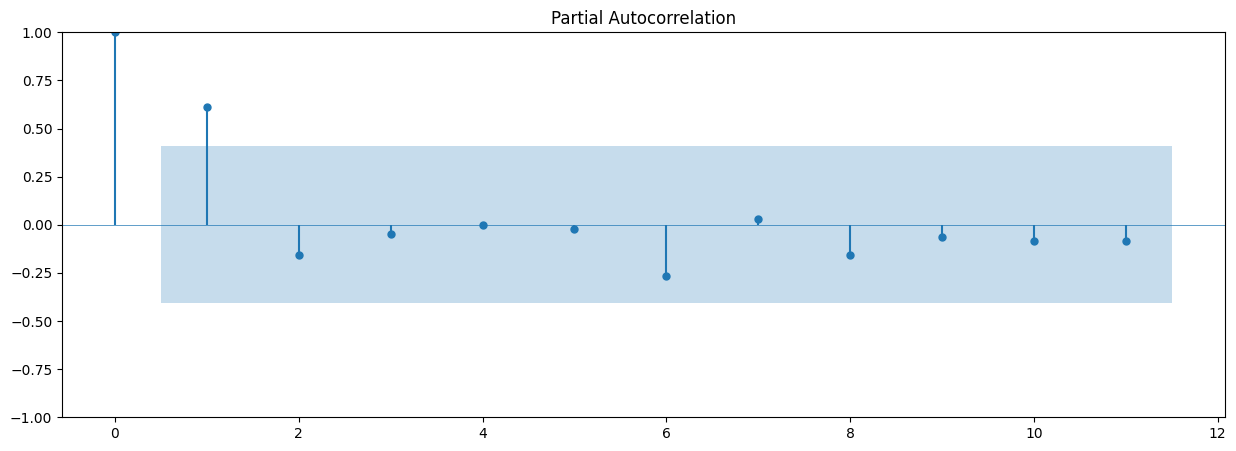

In [ ]:
# Resamplear los datos
dfhora = dftra.resample('H').mean()

# Número de lags
nlag = 11

# Autocorrelación y autocorrelación parcial para datos resampleados cada 1 hora
print("Autocorrelación para datos resampleados cada 1 hora:")
plot_acf(dfhora['precio_bid'].dropna(), lags=21, linewidth=0.5)  # Autocorrelación
plt.show()

plot_pacf(dfhora['precio_bid'].dropna(), lags=nlag, linewidth=0.5)  # Autocorrelación parcial
plt.show()



**Definition from the previously mentioned paper:**

"Autocorrelation reflects the degree of linear dependence between the values of a time series at a specific index and the values of the time series at indices shifted by \( t-k \) or \( t+k \)."

---

After reviewing these graphs, no clear seasonality is visually present in the intervals, and some data points fall outside the confidence bands. A test will be conducted to verify this observation.



## **Analytical Method (Augmented Dickey-Fuller Test - ADF)**

The ADF test is a unit root test that statistically detects the presence of stochastic trend behavior in the time series of variables by using a hypothesis contrast.

In the presence of autocorrelation, it is necessary to differentiate the closing price series from Binance. Thus, the hypotheses to be tested are:

**H0: ρ = 0** The series has a unit root and is not stationary.

**H1: ρ < 0** The series does not have a unit root and is stationary.

In other words, the null hypothesis is the presence of a unit root or non-stationarity, while the alternative hypothesis suggests stationarity of the data.

$credits \text{ } to \text{ } Professor: \text{ } Keyla \text{ } Alba \text{ } for \text{ } the \text{ } information$


In [ ]:
# Prueba ADF para la serie resampleada a 5 minutos
adf_result_5min = adfuller(df5min['precio_bid'].dropna())
print('Resample 5 Minutos')
print('ADF Statistic: %f' % adf_result_5min[0])
print('p-value: %f' % adf_result_5min[1])
print()


Resample 5 Minutos
ADF Statistic: -2.416044
p-value: 0.137259



In [ ]:
# Prueba ADF para la serie resampleada a 30 minutos
adf_result_30min = adfuller(df30min['precio_bid'].dropna())
print('Resample 30 Minutos')
print('ADF Statistic: %f' % adf_result_30min[0])
print('p-value: %f' % adf_result_30min[1])
print()


Resample 30 Minutos
ADF Statistic: -2.193802
p-value: 0.208503



In [ ]:
# Prueba ADF para la serie resampleada por hora
adf_result_hora = adfuller(dfhora['precio_bid'].dropna())
print('Resample Por Hora')
print('ADF Statistic: %f' % adf_result_hora[0])
print('p-value: %f' % adf_result_hora[1])
print()


Resample Por Hora
ADF Statistic: -2.251910
p-value: 0.187947



The results obtained are as follows:

- **Resample by Hour:**
  - ADF Statistic: -2.251910
  - p-value: 0.187947

- **Resample 30 Minutes:**
  - ADF Statistic: -2.193802
  - p-value: 0.208503

- **Resample 5 Minutes:**
  - ADF Statistic: -2.416044
  - p-value: 0.137259

In all cases, the p-value is higher than the 0.05 significance level, suggesting that we cannot reject the null hypothesis. This indicates that the time series does not show sufficient evidence to be considered stationary and may contain a unit root.


# Differencing Application

Due to the previous results, we will apply the differencing method to transform a non-stationary series into a stationary one.



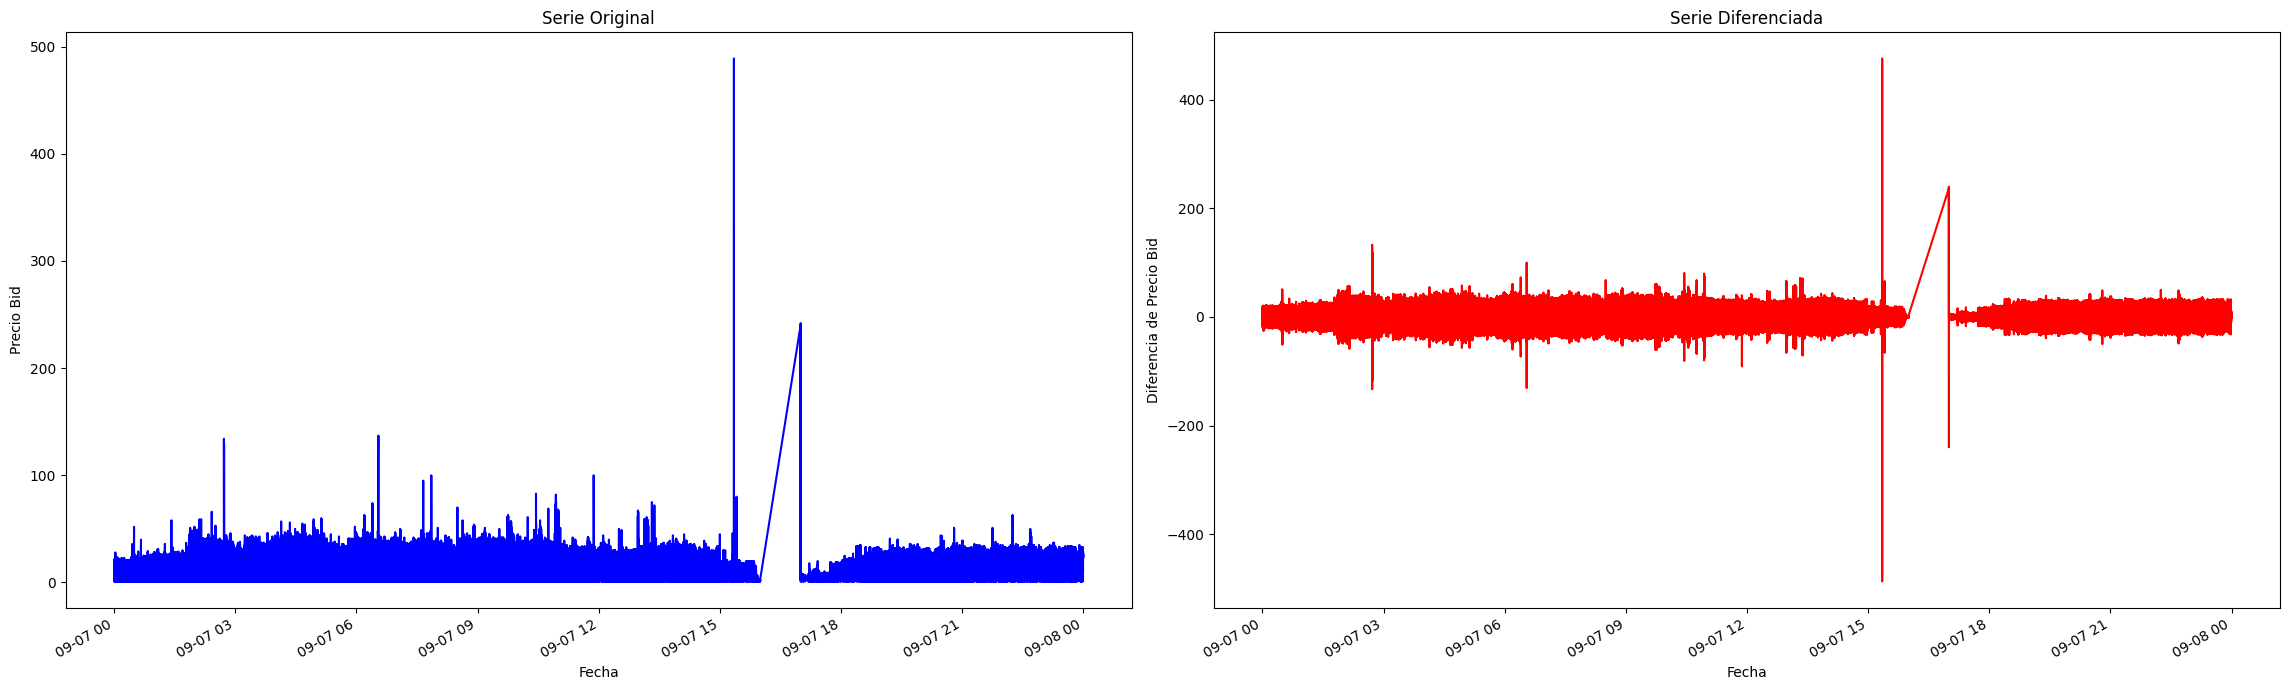

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


dftra['precio_bid_diff'] = dftra['precio_bid'].diff()
plt.figure(figsize=(23, 7))
plt.subplot(1, 2, 1)
dftra['precio_bid'].plot(title='Serie Original', color='b')
plt.xlabel('Fecha')
plt.ylabel('Precio Bid')
plt.subplot(1, 2, 2)
dftra['precio_bid_diff'].plot(title='Serie Diferenciada', color='r')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Precio Bid')
plt.tight_layout()
plt.show()


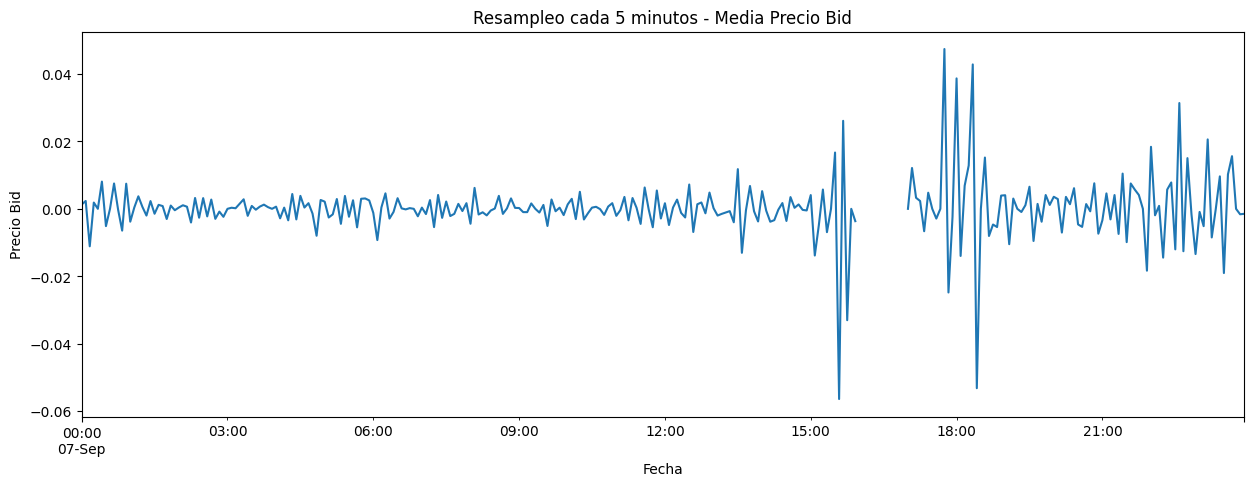

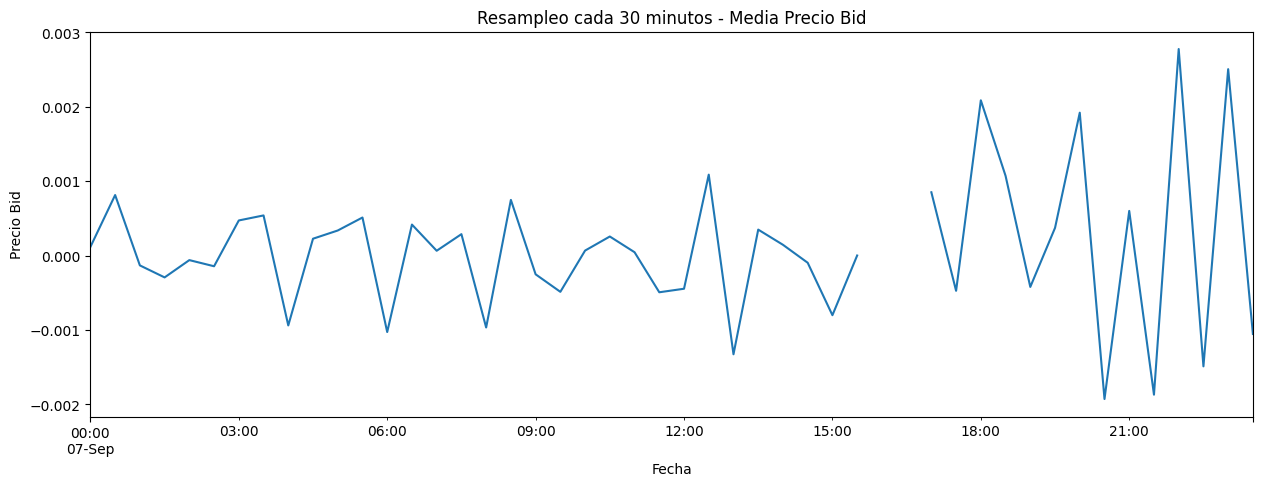

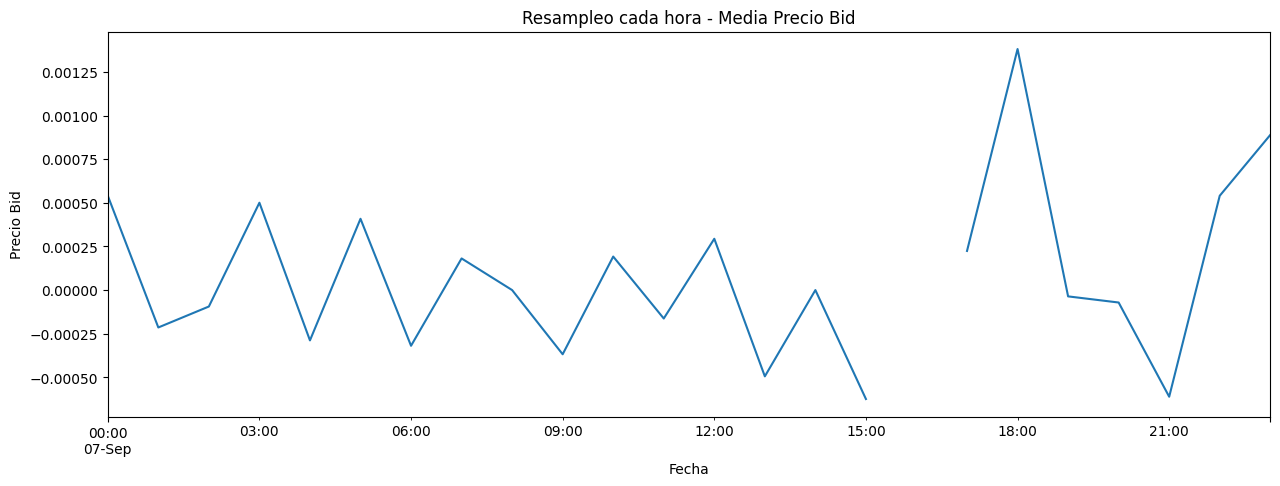

In [ ]:

df5min = dftra.resample('5T').mean()
df30min = dftra.resample('30T').mean()
dfhora = dftra.resample('H').mean()

# Graficamos las series resampleadas
def plot_resampled_data(df_resampled, title):
    df_resampled['precio_bid_diff'].plot(color='tab:blue')
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio Bid')
    plt.show()

plot_resampled_data(df5min, 'Resampleo cada 5 minutos - Media Precio Bid')
plot_resampled_data(df30min, 'Resampleo cada 30 minutos - Media Precio Bid')
plot_resampled_data(dfhora, 'Resampleo cada hora - Media Precio Bid')

After applying the differencing method, we generated these graphs to observe whether our series is now stationary. Visually, it appears that only one differencing step was necessary.


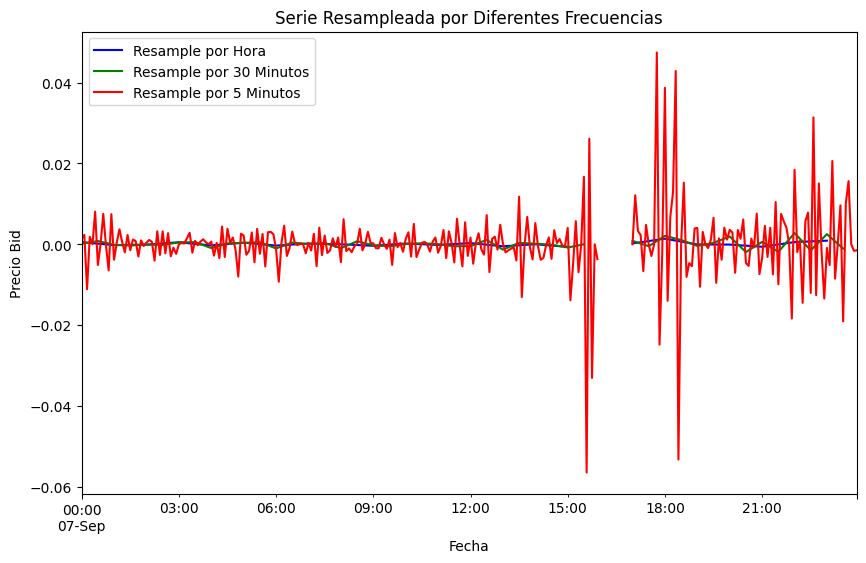

In [ ]:
# Paso 1: Resamplear la serie temporal a diferentes frecuencias
df_hora = dftra['precio_bid_diff'].resample('H').mean()  # Resampleo por hora
df_30min = dftra['precio_bid_diff'].resample('30T').mean()  # Resampleo cada 30 minutos
df_5min = dftra['precio_bid_diff'].resample('5T').mean()  # Resampleo cada 5 minutos

# Paso 2: Graficar la serie resampleada por diferentes frecuencias
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la serie resampleada por hora en azul
df_hora.plot(ax=ax, color='b', label='Resample por Hora')

# Graficar la serie resampleada por 30 minutos en verde
df_30min.plot(ax=ax, color='g', label='Resample por 30 Minutos')

# Graficar la serie resampleada por 5 minutos en rojo
df_5min.plot(ax=ax, color='r', label='Resample por 5 Minutos')

# Configurar etiquetas y título
ax.set_title('Serie Resampleada por Diferentes Frecuencias')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio Bid')
plt.legend()
plt.show()

Here, we observe the graphs of the differenced and resampled series, with the previously mentioned characteristics, but now showing apparent visual stationarity.


# Autocorrelation and Partial Autocorrelation
After performing the differencing.


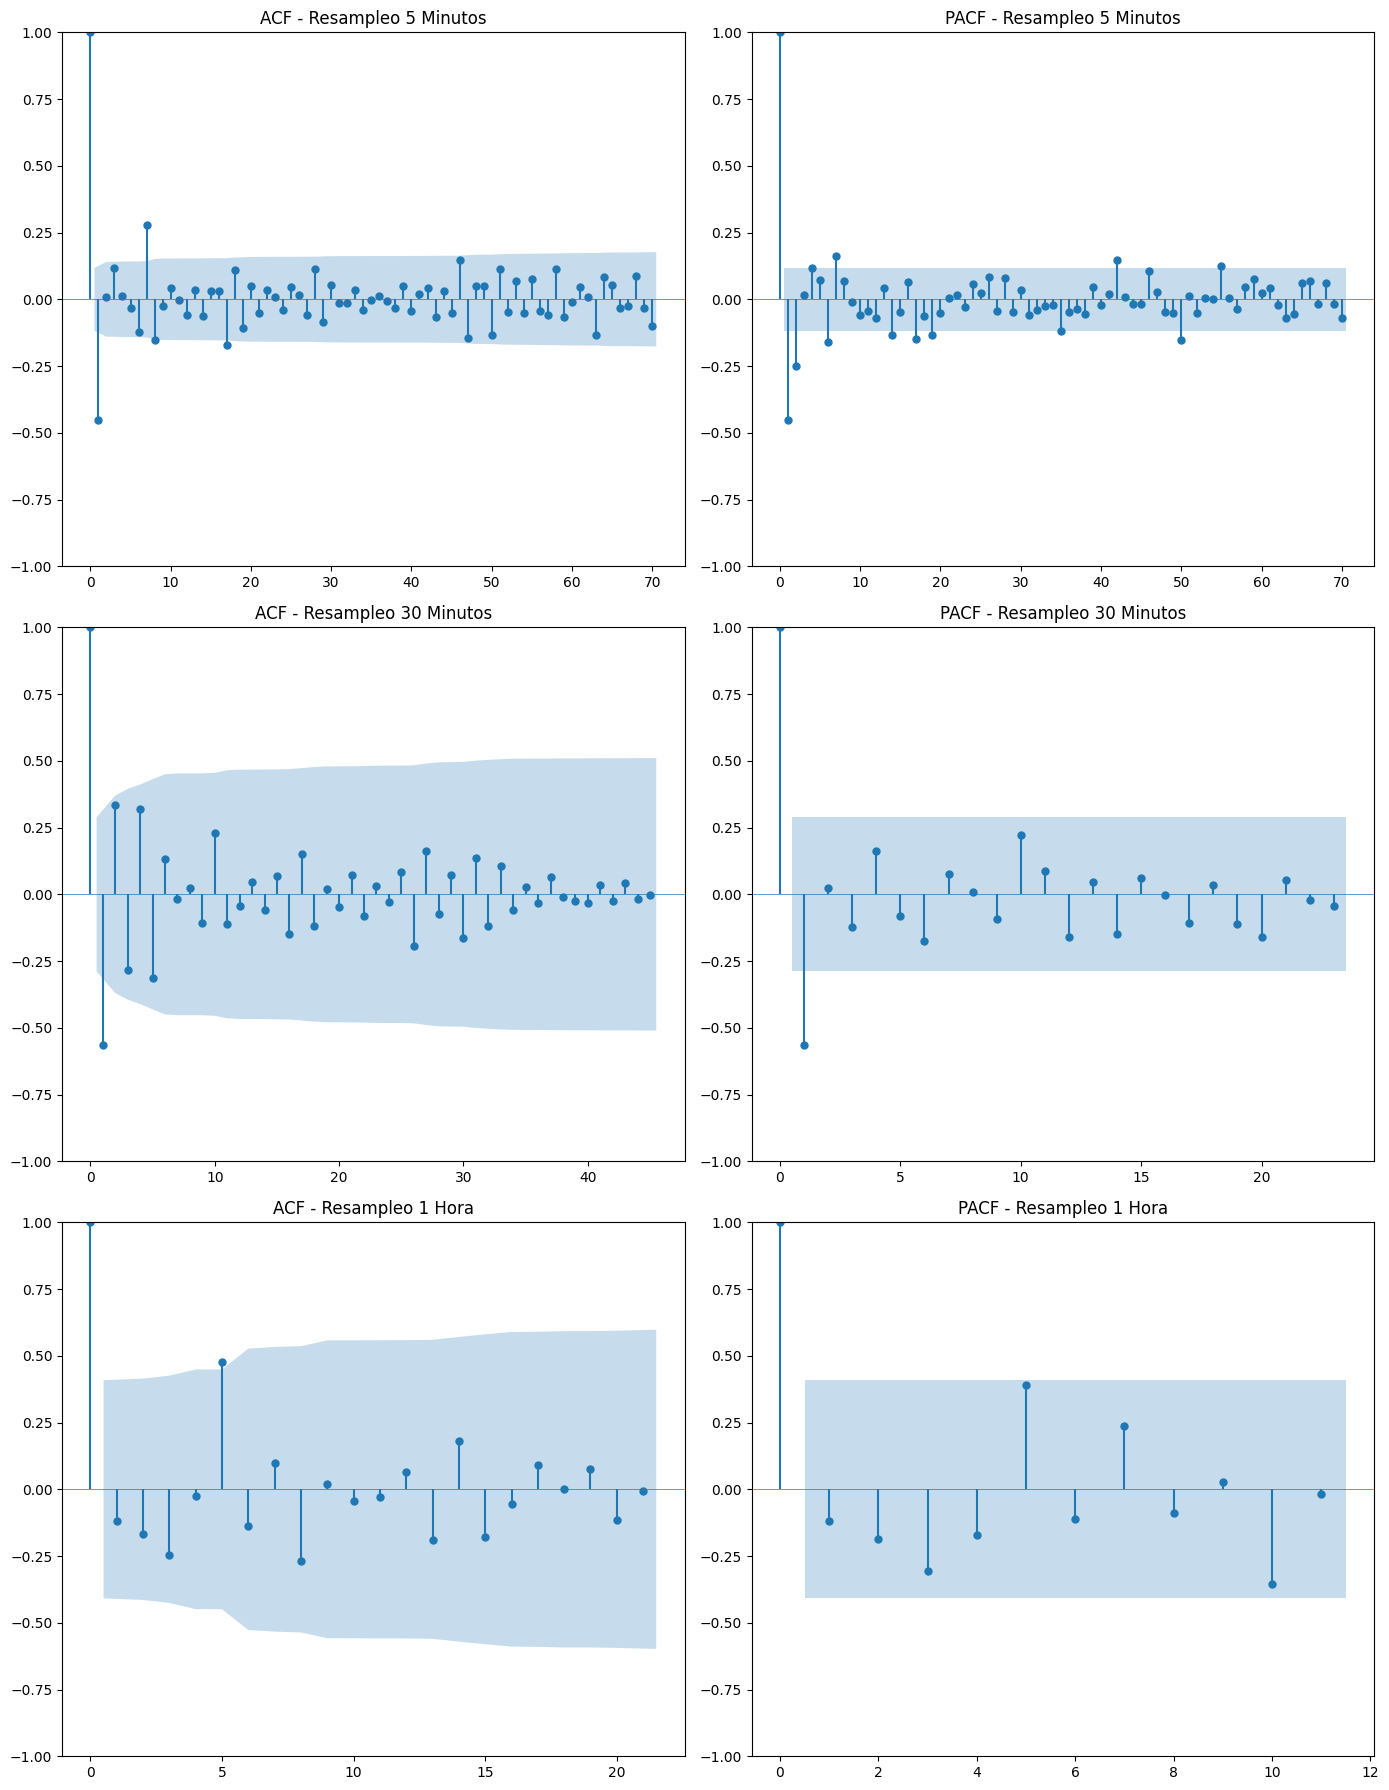

In [ ]:
df5min = dftra.resample('5T').mean()
df30min = dftra.resample('30T').mean()
dfhora = dftra.resample('H').mean()

nlag_5min = 70
nlag_30min = 23
nlag_hora = 11

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Gráficas para resampleo cada 5 minutos
plot_acf(df5min['precio_bid_diff'].dropna(), lags=nlag_5min, ax=axes[0, 0], linewidth=0.5)
axes[0, 0].set_title("ACF - Resampleo 5 Minutos")
plot_pacf(df5min['precio_bid_diff'].dropna(), lags=nlag_5min, ax=axes[0, 1], linewidth=0.5)
axes[0, 1].set_title("PACF - Resampleo 5 Minutos")

# Gráficas para resampleo cada 30 minutos
plot_acf(df30min['precio_bid_diff'].dropna(), lags=45, ax=axes[1, 0], linewidth=0.5)
axes[1, 0].set_title("ACF - Resampleo 30 Minutos")
plot_pacf(df30min['precio_bid_diff'].dropna(), lags=nlag_30min, ax=axes[1, 1], linewidth=0.5)
axes[1, 1].set_title("PACF - Resampleo 30 Minutos")

# Gráficas para resampleo cada 1 hora
plot_acf(dfhora['precio_bid_diff'].dropna(), lags=21, ax=axes[2, 0], linewidth=0.5)
axes[2, 0].set_title("ACF - Resampleo 1 Hora")
plot_pacf(dfhora['precio_bid_diff'].dropna(), lags=nlag_hora, ax=axes[2, 1], linewidth=0.5)
axes[2, 1].set_title("PACF - Resampleo 1 Hora")

plt.tight_layout()
plt.show()


After reviewing the autocorrelation and partial autocorrelation, we notice a visual change compared to the previous analysis, as seasonality is now evident.


## **Analytical Method (Augmented Dickey-Fuller Test - ADF)**
After applying differencing.

**Hypothesis Statement:**
- **H0: ρ = 0** The series has a unit root and is not stationary.
- **H1: ρ < 0** The series does not have a unit root and is stationary.



In [ ]:
# Prueba ADF para la serie resampleada a 5 minutos
adf_result_5min = adfuller(df5min['precio_bid_diff'].dropna())
print('Resample 5 Minutos')
print('ADF Statistic: %f' % adf_result_5min[0])
print('p-value: %f' % adf_result_5min[1])
print()


Resample 5 Minutos
ADF Statistic: -5.684171
p-value: 0.000001



In [ ]:
# Prueba ADF para la serie resampleada a 30 minutos
adf_result_30min = adfuller(df30min['precio_bid_diff'].dropna())
print('Resample 30 Minutos')
print('ADF Statistic: %f' % adf_result_30min[0])
print('p-value: %f' % adf_result_30min[1])
print()

Resample 30 Minutos
ADF Statistic: -12.487952
p-value: 0.000000



In [ ]:
# Prueba ADF para la serie resampleada por hora
adf_result_hora = adfuller(dfhora['precio_bid_diff'].dropna())
print('Resample Por Hora')
print('ADF Statistic: %f' % adf_result_hora[0])
print('p-value: %f' % adf_result_hora[1])
print()

Resample Por Hora
ADF Statistic: -1.384520
p-value: 0.589675



The results obtained are as follows:

- **Resample 5 Minutes:**
  - ADF Statistic: -5.684171
  - p-value: 0.000001

- **Resample 30 Minutes:**
  - ADF Statistic: -12.487952
  - p-value: 0.000000

- **Resample by Hour:**
  - ADF Statistic: -1.384520
  - p-value: 0.589675

- **Resample 5 Minutes** and **Resample 30 Minutes**:
  In both cases, the p-values are significantly lower than 0.05, allowing us to reject the null hypothesis of a unit root. This indicates that the differenced time series is stationary at these time intervals. The ADF statistics are negative and large in magnitude, further supporting the evidence that the series do not have a unit root.

- **Resample by Hour**:
  In this case, the p-value is greater than 0.05, suggesting that we cannot reject the null hypothesis. This indicates that the differenced time series is not stationary when resampled at hourly intervals.

